In [48]:
import seaborn as sns
import mat73
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import matplotlib as mpl
from datetime import datetime
import matplotlib.ticker as ticker

In [3]:
quad = mat73.loadmat(r"C:\Users\22371812\OneDrive - The University of Western Australia\Documents\PhD\chapters\Rottnest\Instruments_data\1.Part_1\Quadpod\Quadpod_instruments.mat")
B = np.load('Benilov_vector.npy', allow_pickle=True)
Benilov_vector=B[()]
v = np.load('BrickerMonismith_vectrino.npy', allow_pickle=True)
BM_vectrino = v[()]
trip = mat73.loadmat(r"C:\Users\22371812\OneDrive - The University of Western Australia\Documents\PhD\chapters\Rottnest\Instruments_data\1.Part_1\Tripod\AQD11898\Tripod_instruments.mat")

In [7]:
Vec_h = np.empty((122,))*np.NaN
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

for num in np.arange(122):
    Vec_h[num] = np.around(np.float(quad['Vectrino']['BottomDistance'][num][0]),2)


heights = np.arange(0.05,max(Vec_h)+0.01,0.01)
# print(Vec_h)

In [8]:
avg_vectrino = np.zeros(122)
avg_vectrino_rms = np.zeros(122)
ratio_aqd_freestream_cur = np.zeros((122,37))
ratio_aqd_freestream_urms = np.zeros((122,37))
N = len(quad['Vectrino']['InitialTime_Matlab'])

ratio_vectrino_freestream_cur = np.empty((N,))*np.NaN
ratio_vectrino_freestream_urms = np.empty((N,))*np.NaN
    
for ii in range(len(quad['Vectrino']['MeanVel'])):
    n=np.array(quad['Vectrino']['MeanVel'][ii])
    aux=np.squeeze(n[0])
    
    n2=np.array(quad['Vectrino']['ubr'][ii])
    aux2=np.squeeze(n2[0])
    avg_vectrino[ii] = np.nanmean(aux[11:15])
    avg_vectrino_rms[ii] = np.nanmean(aux2[11:15])
    
    idx, time_idx = find_nearest(trip['AQD11898']['time_ft'],quad['Vectrino']['InitialTime_Matlab'][ii])
    ratio_vectrino_freestream_cur [ii] = np.nanmean(quad['Vectrino']['MeanVel'][ii][0][11:15])/trip['AQD11898']['freestream'][idx]
    ratio_vectrino_freestream_urms [ii] = np.nanmean(quad['Vectrino']['ubr'][ii][0][11:15])/np.nanmean(trip['AQD11898']['ubr'][idx][30:35])
    ratio_aqd_freestream_cur [ii] = trip['AQD11898']['Mean_Current'][idx]/trip['AQD11898']['freestream'][idx]
    ratio_aqd_freestream_urms [ii] = trip['AQD11898']['ubr'][idx]/np.nanmean(trip['AQD11898']['ubr'][idx][30:35])
    
avg_aqd = np.empty(len(trip['AQD11898']['Mean_Current']))
avg_aqd_rms = np.empty(len(trip['AQD11898']['Mean_Current']))
for ii in range(len(trip['AQD11898']['Mean_Current'])):
    n=np.array(trip['AQD11898']['Mean_Current'][ii])
    
    n2=np.array(trip['AQD11898']['ubr'][ii])

    avg_aqd[ii] = np.nanmean(n[29:35])
    avg_aqd_rms[ii] = np.nanmean(n2[29:35])

In [28]:
# N = len(quad['Vectrino']['InitialTime_Matlab'])
# M = len(quad['ADV1670']['time_ft'])

# ratio_vectrino_freestream_cur = np.empty((N,))*np.NaN
# ratio_vectrino_freestream_urms = np.empty((N,))*np.NaN
# ratio_vector_freestream_cur = np.empty((N,))*np.NaN
# ratio_vector_freestream_urms = np.empty((N,))*np.NaN

# for ii in range(N):

#     if quad['Vectrino']['BottomDistance'][ii][0]<=0.1 and quad['Vectrino']['InitialTime_Matlab'][ii][0]> 737494.5:
#         idx, time_idx = find_nearest(trip['AQD11898']['time_ft'],quad['Vectrino']['InitialTime_Matlab'][ii])
#         ratio_vectrino_freestream_cur [ii] = np.nanmean(quad['Vectrino']['MeanVel'][ii][0][11:15])/trip['AQD11898']['freestream'][idx]
#         ratio_vectrino_freestream_urms [ii] = np.nanmean(quad['Vectrino']['ubr'][ii][0][11:15])/np.nanmean(trip['AQD11898']['ubr'][idx][11:15])
        
# for ii in range(N):
# #     idx, time_idx = find_nearest(trip['AQD11898']['time_ft'],quad['ADV1670']['time_ft'][ii])
# #     ratio_vector_freestream_cur [ii] = np.nanmean(quad['ADV1670']['Current_Mean'][ii])/trip['AQD11898']['freestream'][idx]
# #     ratio_vector_freestream_urms [ii] = np.nanmean(quad['ADV1670']['ubr'][ii])/np.nanmean(trip['AQD11898']['ubr'][idx][11:15])
#     if quad['Vectrino']['BottomDistance'][ii][0]<=0.2 and quad['Vectrino']['InitialTime_Matlab'][ii][0]> 737494.5:
#         idx, time_idx = find_nearest(trip['AQD11898']['time_ft'],quad['Vectrino']['InitialTime_Matlab'][ii])
#         ratio_vector_freestream_cur [ii] = np.nanmean(quad['Vectrino']['MeanVel'][ii][0][11:15])/trip['AQD11898']['freestream'][idx]
#         ratio_vector_freestream_urms [ii] = np.nanmean(quad['Vectrino']['ubr'][ii][0][11:15])/np.nanmean(trip['AQD11898']['ubr'][idx][11:15])
    
# data = {'vectrino/free_cur': ratio_vectrino_freestream_cur, 'vector/free_cur': ratio_vector_freestream_cur,
#         'vectrino/free_urms': ratio_vectrino_freestream_urms, 'vector/free_urms': ratio_vector_freestream_urms} 

# #         r'$\u_rms 10 cmab/210 cmab$': ratio_vectrino_freestream_urms, r'$\u_rms 40 cmab/210 cmab$': ratio_vector_freestream_urms} 
# dict_df={}
# dict_df = pd.DataFrame({ key:pd.Series(value) for key, value in data.items() })

# dict_df = dict_df.apply(lambda x: [y if y <= .99 else np.nan for y in x])
#dict_df[dict_df>=1] = np.nan
#ratio_vectrino_freestream_cur[ratio_vectrino_freestream_cur>=1]=np.nan
#ratio_vectrino_freestream_urms[ratio_vectrino_freestream_urms>=1]=np.nan
avg_vectrino = np.zeros(122)
avg_vectrino_rms = np.zeros(122)
ratio_aqd_freestream_cur = np.zeros((122,37))
ratio_aqd_freestream_urms = np.zeros((122,37))
N = len(quad['Vectrino']['InitialTime_Matlab'])

ratio_vectrino_freestream_cur = np.empty((N,))*np.NaN
ratio_vectrino_freestream_urms = np.empty((N,))*np.NaN
    
for ii in range(len(quad['Vectrino']['MeanVel'])):
    n=np.array(quad['Vectrino']['MeanVel'][ii])
    aux=np.squeeze(n[0])
    
    n2=np.array(quad['Vectrino']['ubr'][ii])
    aux2=np.squeeze(n2[0])
    avg_vectrino[ii] = np.nanmean(aux[11:15])
    avg_vectrino_rms[ii] = np.nanmean(aux2[11:15])
    
    idx, time_idx = find_nearest(trip['AQD11898']['time_ft'],quad['Vectrino']['InitialTime_Matlab'][ii])
    ratio_vectrino_freestream_cur [ii] = np.nanmean(quad['Vectrino']['MeanVel'][ii][0][11:15])/trip['AQD11898']['freestream'][idx]
    ratio_vectrino_freestream_urms [ii] = np.nanmean(quad['Vectrino']['ubr'][ii][0][11:15])/np.nanmean(trip['AQD11898']['ubr'][idx][30:35])
    ratio_aqd_freestream_cur [ii] = trip['AQD11898']['Mean_Current'][idx]/trip['AQD11898']['freestream'][idx]
    ratio_aqd_freestream_urms [ii] = trip['AQD11898']['ubr'][idx]/np.nanmean(trip['AQD11898']['ubr'][idx][30:35])
    
avg_aqd = np.empty(len(trip['AQD11898']['Mean_Current']))
avg_aqd_rms = np.empty(len(trip['AQD11898']['Mean_Current']))
for ii in range(len(trip['AQD11898']['Mean_Current'])):
    n=np.array(trip['AQD11898']['Mean_Current'][ii])
    
    n2=np.array(trip['AQD11898']['ubr'][ii])

    avg_aqd[ii] = np.nanmean(n[29:35])
    avg_aqd_rms[ii] = np.nanmean(n2[29:35])

In [45]:
top_canopy_col = (221/256, 96/256, 49/256)
bot_canopy_col = (33/256, 104/256, 105/256)
bottom_col = (2/255, 48/255, 71/255)
free_stream_col = (255/255, 183/255, 3/255);

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)

#myFmt = mdates.DateFormatter('%Y-%m-%d')
myFmt = mdates.DateFormatter('%d %H:%M')
medians = dict_df.median()

In [29]:
# ax1 = fig.add_subplot(gs[0, :])
# #ax1.plot(time, ratio_vectrino_freestream_cur, 'b.', color = bottom_col, markersize=12)
# ax1.plot(time, ratio_vector_freestream_cur , 'r.', color = top_canopy_col, markersize=12)
# #ax1.plot(time_adv, ratio_vector_freestream_cur , '.', color = top_canopy_col, markersize=12)

# #ax1.plot(time, ratio_vectrino_freestream_cur,'.', color = top_canopy_col, time, ratio_vector_freestream_cur,'.', color = top_canopy_col, markersize=12)
# ax1.set_ylim(0, 1)
# # axs[0].set_xlabel('time')
# ax1.xaxis.set_major_formatter(myFmt)
# ax1.set_title('Mean current attenuation')
# ax1.set_ylabel(r"$\overline{u}$ (m/s)")
# #ax1.legend([r"$\overline{u}\ Nearbed / \infty$",r"$\overline{u}\ Top can/ \infty$"])
# ax1.legend([r"$\overline{u}\ Nearbed / \infty$"])
# ax1.grid(True)

# ax2 = fig.add_subplot(gs[1, :])
# #ax2.plot(time, ratio_vectrino_freestream_urms, '.', color = bottom_col, markersize=12)
# ax2.plot(time, ratio_vector_freestream_urms , 'r.', color = top_canopy_col, markersize=12)
# #ax2.plot(time_adv, ratio_vector_freestream_urms , '.', color = top_canopy_col, markersize=12)

# ax2.set_ylim(0, 1)
# #ax2.plot(time, ratio_vectrino_freestream_urms, time, ratio_vector_freestream_urms)
# ax2.set_xlabel('Date in March 2019')
# #ax2.legend([r"$\overline{u}\ Nearbed / \infty$",r"$\overline{u}\ Top can/ \infty$"])
# ax2.legend([r"$u_{rms}\ Nearbed / \infty$"])
# ax2.set_title('Wave urms attenuation')
# ax2.xaxis.set_major_formatter(myFmt)
# params = {'mathtext.default': 'regular' }          
# plt.rcParams.update(params)
# ax2.set_ylabel(r"$u_{rms}$ (m/s)")
# ax2.grid(Tr
ratio_vectrino_freestream_cur[23:34]

array([0.04571244, 0.0545065 , 0.0044631 , 0.02555473, 0.02405218,
       0.05070641, 0.02233998, 0.08294854, 0.30133274, 0.33747175,
       0.55838549])

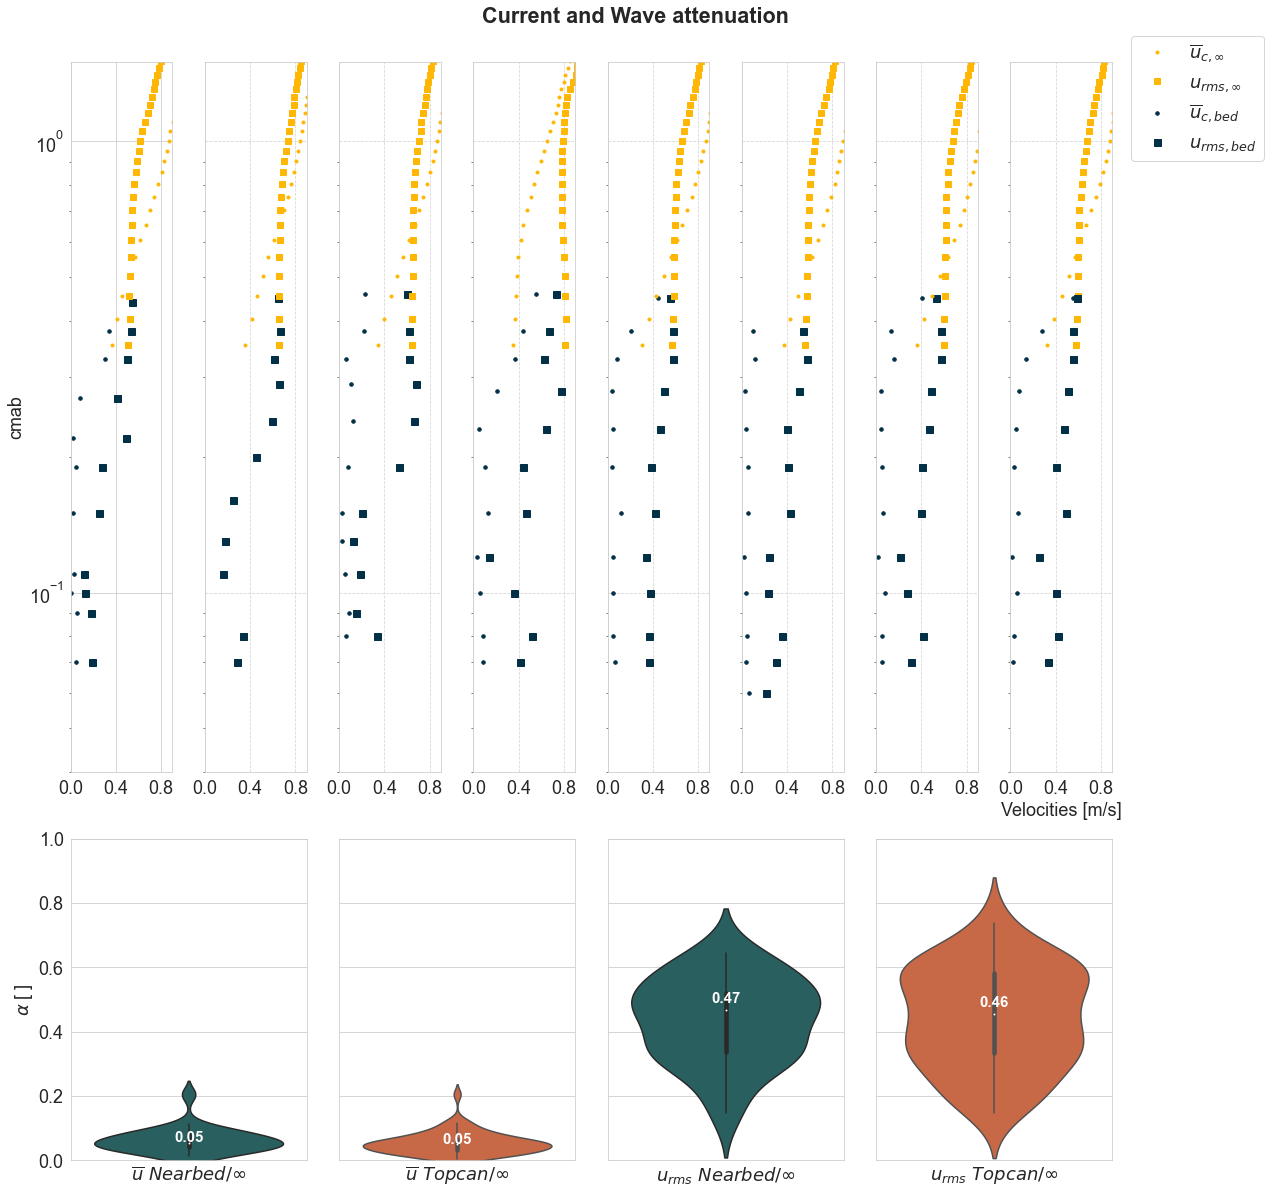

In [50]:
fig = plt.figure(constrained_layout=False, figsize=(18, 17))
fig.suptitle('Current and Wave attenuation', weight = 'bold')
gs = GridSpec(3, 8, figure=fig)
time = np.reshape(np.array(quad['Vectrino']['InitialTime_Matlab']),122)
time = pd.to_datetime(time-719529, unit='D')
time_adv = pd.to_datetime(quad['ADV1670']['time_ft']-719529, unit='D')
time_adp = pd.to_datetime(trip['AQD11898']['time_ft']-719529, unit='D')
plt.rcParams.update({'font.size': 18})

# ax = fig.add_subplot(111)    # The big subplot
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

axes=[]
ax1 = fig.add_subplot(gs[0:2, 0])
ax1.plot(ratio_vectrino_freestream_cur[23:34],quad['Vectrino']['BottomDistance'][23:34],'.', 
         markersize = 7, color = bottom_col)
ax1.plot(ratio_vectrino_freestream_urms[23:34],quad['Vectrino']['BottomDistance'][23:34],'s', 
         markersize = 7, color = bottom_col)
ax1.plot(np.nanmean(ratio_aqd_freestream_cur[23:34],axis=0)[:35],trip['AQD11898']['z'][:35],'.', 
         color = free_stream_col)
ax1.plot(np.nanmean(ratio_aqd_freestream_urms[23:34],axis=0)[:35],trip['AQD11898']['z'][:35],'s', 
         color = free_stream_col)
ax1.set_ylabel('cmab')
ax1.set(ylim=(0.04, 1.5),xlim=(0, 0.9),xticks=(np.arange(0, 1, 0.4)),yscale=('log'))
ax1.yaxis.set_major_locator(ticker.LogLocator(base=10))
ax1.tick_params(which='minor',axis='y',left=True,labelleft=True)


ax = fig.add_subplot(gs[0:2, 1],sharey=ax1)
axes.append(ax)
ax.plot(ratio_vectrino_freestream_cur[35:2:46],quad['Vectrino']['BottomDistance'][35:2:46],'.', markersize = 7, color = bottom_col)
ax.plot(ratio_vectrino_freestream_urms[35:46],quad['Vectrino']['BottomDistance'][35:46],'s', markersize = 7, color = bottom_col)
ax.plot(np.nanmean(ratio_aqd_freestream_cur[35:46],axis=0)[:35],trip['AQD11898']['z'][:35],'.', color = free_stream_col)
ax.plot(np.nanmean(ratio_aqd_freestream_urms[35:46],axis=0)[:35],trip['AQD11898']['z'][:35],'s', color = free_stream_col)

        
ax = fig.add_subplot(gs[0:2, 2],sharey=ax1)
axes.append(ax)
ax.plot(ratio_vectrino_freestream_cur[47:58],quad['Vectrino']['BottomDistance'][47:58],'.', markersize = 7, color = bottom_col)
ax.plot(ratio_vectrino_freestream_urms[47:58],quad['Vectrino']['BottomDistance'][47:58],'s', markersize = 7, color = bottom_col)
ax.plot(np.nanmean(ratio_aqd_freestream_cur[47:58],axis=0)[:35],trip['AQD11898']['z'][:35],'.', color = free_stream_col)
ax.plot(np.nanmean(ratio_aqd_freestream_urms[47:58],axis=0)[:35],trip['AQD11898']['z'][:35],'s', color = free_stream_col)

ax = fig.add_subplot(gs[0:2, 3],sharey=ax1)
axes.append(ax)
ax.plot(ratio_vectrino_freestream_cur[61:72],quad['Vectrino']['BottomDistance'][61:72],'.', markersize = 7, color = bottom_col)
ax.plot(ratio_vectrino_freestream_urms[61:72],quad['Vectrino']['BottomDistance'][61:72],'s', markersize = 7, color = bottom_col)
ax.plot(np.nanmean(ratio_aqd_freestream_cur[61:72],axis=0)[:35],trip['AQD11898']['z'][:35],'.', color = free_stream_col)
ax.plot(np.nanmean(ratio_aqd_freestream_urms[61:72],axis=0)[:35],trip['AQD11898']['z'][:35],'s', color = free_stream_col)

ax = fig.add_subplot(gs[0:2, 4],sharey=ax1)
axes.append(ax)
ax.plot(ratio_vectrino_freestream_cur[75:86],quad['Vectrino']['BottomDistance'][75:86],'.', markersize = 7, color = bottom_col)
ax.plot(ratio_vectrino_freestream_urms[75:86],quad['Vectrino']['BottomDistance'][75:86],'sk', markersize = 7, color = bottom_col)
ax.plot(np.nanmean(ratio_aqd_freestream_cur[75:86],axis=0)[:35],trip['AQD11898']['z'][:35],'.', color = free_stream_col)
ax.plot(np.nanmean(ratio_aqd_freestream_urms[75:86],axis=0)[:35],trip['AQD11898']['z'][:35],'s', color = free_stream_col)

ax = fig.add_subplot(gs[0:2, 5],sharey=ax1)
axes.append(ax)
ax.plot(ratio_vectrino_freestream_cur[87:98],quad['Vectrino']['BottomDistance'][87:98],'.', markersize = 7, color = bottom_col)
ax.plot(ratio_vectrino_freestream_urms[87:98],quad['Vectrino']['BottomDistance'][87:98],'sk', markersize = 7, color = bottom_col)
ax.plot(np.nanmean(ratio_aqd_freestream_cur[87:98],axis=0)[:35],trip['AQD11898']['z'][:35],'.', color = free_stream_col)
ax.plot(np.nanmean(ratio_aqd_freestream_urms[87:98],axis=0)[:35],trip['AQD11898']['z'][:35],'s', color = free_stream_col)

ax = fig.add_subplot(gs[0:2, 6],sharey=ax1)
axes.append(ax)
ax.plot(ratio_vectrino_freestream_cur[99:110],quad['Vectrino']['BottomDistance'][99:110],'.', markersize = 7, color = bottom_col)
ax.plot(ratio_vectrino_freestream_urms[99:110],quad['Vectrino']['BottomDistance'][99:110],'sk', markersize = 7, color = bottom_col)
ax.plot(np.nanmean(ratio_aqd_freestream_cur[99:110],axis=0)[:35],trip['AQD11898']['z'][:35],'.', color = free_stream_col)
ax.plot(np.nanmean(ratio_aqd_freestream_urms[99:110],axis=0)[:35],trip['AQD11898']['z'][:35],'s', color = free_stream_col)

ax = fig.add_subplot(gs[0:2, 7],sharey=ax1)
axes.append(ax)
ax.plot(np.nanmean(ratio_aqd_freestream_cur[111:122],axis=0)[:35],trip['AQD11898']['z'][:35],'.', color = free_stream_col)
ax.plot(np.nanmean(ratio_aqd_freestream_urms[111:122],axis=0)[:35],trip['AQD11898']['z'][:35],'s', color = free_stream_col)
ax.plot(ratio_vectrino_freestream_cur[111:122],quad['Vectrino']['BottomDistance'][111:122],'.', markersize = 7, color = bottom_col)
ax.plot(ratio_vectrino_freestream_urms[111:122],quad['Vectrino']['BottomDistance'][111:122],'sb', markersize = 7, color = bottom_col)

for i,x in enumerate(axes):
    x.set(ylim=(0.04, 1.5),xlim=(0, 0.9),xticks=(np.arange(0, 1, 0.4)),yscale=('log'))
    x.grid(b=True,ls='--',alpha=0.8)
    x.tick_params(labelleft=False)
    x.tick_params(which='minor',left=True)

    
ax.legend([r"$\overline{u}_{c,\infty}$",r"$u_{rms,\infty}$",r"$\overline{u}_{c,bed}$",r"$u_{rms,bed}$"],
          bbox_to_anchor=(1.1, 1.05))
ax.set_xlabel('Velocities [m/s]')


sns.set_style("whitegrid")
ax = fig.add_subplot(gs[2, 0:2])
sns.violinplot(data=dict_df['vectrino/free_cur'], color = bot_canopy_col)
ax.set_ylim(0, 1)
ax.set_ylabel(r"$\alpha$ [ ]")
ax.tick_params(labelbottom=False)
ax.set_xlabel(r"$\overline{u}\ Nearbed / \infty$")
ax.text(0,medians[0] *1.05,"{:.2f}".format(medians[0]),horizontalalignment='center',size='small',color='w',weight='semibold')

# set(xlim=(0,10),ylim=(0,100)))

ax = fig.add_subplot(gs[2, 2:4])
s1=sns.violinplot(data=dict_df['vector/free_cur'], color = top_canopy_col)
ax.set_ylim(0, 1)
ax.tick_params(labelleft=False, labelbottom=False)
ax.set_xlabel(r"$\overline{u}\ Top can/ \infty$")
ax.text(0,medians[1] *1.05,"{:.2f}".format(medians[1]),horizontalalignment='center',size='small',color='w',weight='semibold')

ax = fig.add_subplot(gs[2, 4:6])
sns.violinplot(data=dict_df['vectrino/free_urms'], color = bot_canopy_col)
ax.set_ylim(0, 1)
ax.tick_params(labelleft=False, labelbottom=False)
ax.set(xlabel='common xlabel')
ax.set_xlabel(r"$u_{rms}\ Nearbed / \infty$")
ax.text(0,medians[2] *1.05,"{:.2f}".format(medians[2]),horizontalalignment='center',size='small',color='w',weight='semibold')

ax = fig.add_subplot(gs[2, 6:8])
sns.violinplot(data=dict_df['vector/free_urms'], color = top_canopy_col)
ax.set(ylim=(0, 1),xlim=(-.5, .5),xlabel=r"$u_{rms}\ Top can / \infty$")
ax.tick_params(labelleft=False, labelbottom=False)
ax.text(0,medians[3] *1.05,"{:.2f}".format(medians[3]),horizontalalignment='center',size='small',color='w',weight='semibold')

fig.tight_layout()
fig.savefig(r'C:\Users\22371812\OneDrive - The University of Western Australia\Documents\PhD\chapters\Rottnest\Plots\Figure2_vectrino_prof.png',
           facecolor='white', transparent=False, dpi=300)